# **Decision Tree: Class Prediction**

In this lab, we will build a decision tree to predict the class of an unknown patient or to prescribe a drug to a new patient,You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

In the following sections, we'll:
- clean and prepare the data,
- build a decision tree with default hyperparameters,
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.

### Understanding and Cleaning the Data

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')

In [ ]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Let's understand the data, how it look like.
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# Let's check whether data set consist of any missing values.
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


No missing values are found.

### Data Preparation

There are a number of preprocessing steps we need to do before building the model.

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```.

In [ ]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [ ]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4


In [ ]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


In [ ]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Na_to_K      200 non-null    float64
 2   Sex          200 non-null    int64  
 3   BP           200 non-null    int64  
 4   Cholesterol  200 non-null    int64  
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
# convert type of target variable Drug to categorical
df['Drug'] = df['Drug'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Na_to_K      200 non-null    float64 
 2   Sex          200 non-null    int64   
 3   BP           200 non-null    int64   
 4   Cholesterol  200 non-null    int64   
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 8.3 KB


### Model Building and Evaluation

Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [ ]:
# Importing train-test-split
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = df.drop('Drug',axis=1)

# Putting response variable to y
y = df['Drug']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)
X_train.head()


,Age,Na_to_K,Sex,BP,Cholesterol
16,69,11.455,1,1,1
51,67,10.898,1,2,1
97,56,25.395,0,0,0
164,16,19.007,1,0,1
71,28,19.675,0,2,0


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.93      0.97        15
           4       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.99      0.99        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[ 7  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 15]]
0.975


### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries.
We need the ```graphviz``` library to plot a tree.

In [ ]:
# Importing required packages for visualization
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[0:5])
features

['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol']

**Note**:<br>
Python requires library pydot and an external software graphviz to visualize the decision tree. If you are on windows, you'll need to specify the path for the pydot library to access dot file from graphviz.

In [ ]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

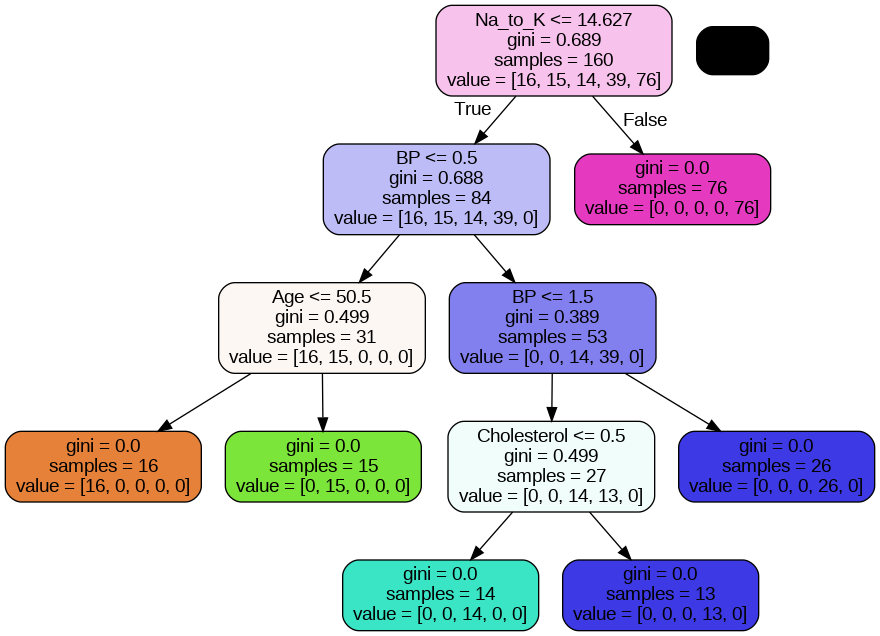

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Tree is simple. No need of hyperparameter tuning

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth.

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional)
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027572,0.007185,0.020142,0.012305,1,{'max_depth': 1},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.000000,39,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000
1,0.025219,0.016865,0.018948,0.010609,2,{'max_depth': 2},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.012500,38,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
2,0.011975,0.000109,0.005326,0.002843,3,{'max_depth': 3},0.90625,0.87500,0.78125,0.90625,...,0.88125,0.053765,37,0.921875,0.929688,0.937500,0.921875,0.914062,0.92500,0.007967
3,0.012477,0.000571,0.003919,0.000299,4,{'max_depth': 4},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.025000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
4,0.012264,0.004598,0.009022,0.004245,5,{'max_depth': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.025000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000


Now let's visualize how train and test score changes with max_depth.

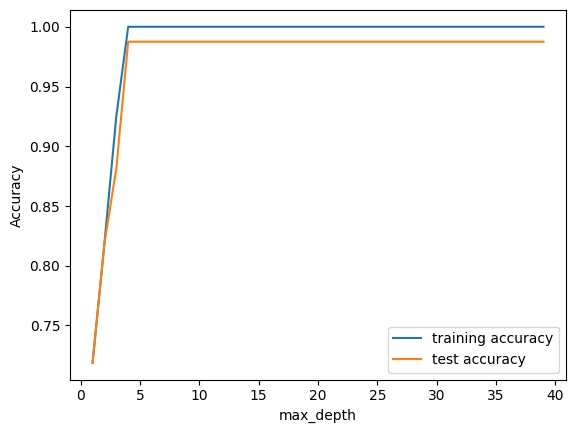

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The training accuracy (blue) reaches 1.0 quickly, meaning the model is perfectly fitting the training data.

The test accuracy (orange) also rises but flattens, showing no improvement beyond a certain depth.

Overfitting occurs when max_depth is too high (training accuracy = 1.0, but test accuracy does not improve).

The optimal max_depth appears to be around 5, where both training and test accuracy are high and balanced.

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005035,0.000326,0.003742,0.000143,5,{'min_samples_leaf': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.0250,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
1,0.004778,0.000185,0.003730,0.000202,25,{'min_samples_leaf': 25},0.68750,0.81250,0.81250,0.81250,...,0.78750,0.0500,2,0.718750,0.820312,0.820312,0.820312,0.820312,0.80000,0.040625
2,0.004752,0.000150,0.003705,0.000148,45,{'min_samples_leaf': 45},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.0000,3,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000
3,0.005112,0.000373,0.004453,0.000604,65,{'min_samples_leaf': 65},0.46875,0.46875,0.46875,0.46875,...,0.47500,0.0125,4,0.476562,0.476562,0.476562,0.476562,0.468750,0.47500,0.003125
4,0.006639,0.002906,0.004367,0.000326,85,{'min_samples_leaf': 85},0.46875,0.46875,0.46875,0.46875,...,0.47500,0.0125,4,0.476562,0.476562,0.476562,0.476562,0.468750,0.47500,0.003125


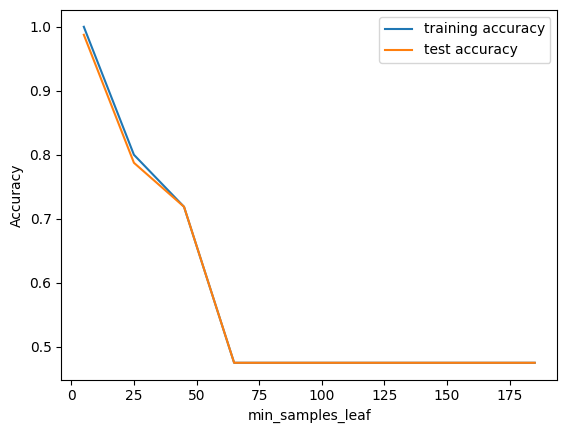

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Low min_samples_leaf (1-5): High training accuracy, risk of overfitting.

Moderate values (10-25): Accuracy stabilizes, better generalization.

High values (50+): Accuracy drops sharply, leading to underfitting.

Optimal range: Likely 5-25, where both training and test accuracy are balanced.

### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005777,0.001421,0.004560,0.000820,5,{'min_samples_split': 5},1.00000,1.00000,0.93750,1.00000,...,0.98750,0.02500,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
1,0.005766,0.001557,0.004913,0.001565,25,{'min_samples_split': 25},0.81250,0.87500,0.78125,0.90625,...,0.86250,0.05796,2,0.828125,0.929688,0.937500,0.921875,0.914062,0.90625,0.039836
2,0.004786,0.000898,0.003544,0.000550,45,{'min_samples_split': 45},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.01250,3,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
3,0.004315,0.000192,0.003703,0.000216,65,{'min_samples_split': 65},0.84375,0.81250,0.81250,0.81250,...,0.81875,0.01250,3,0.812500,0.820312,0.820312,0.820312,0.820312,0.81875,0.003125
4,0.004357,0.000328,0.003440,0.000461,85,{'min_samples_split': 85},0.71875,0.71875,0.71875,0.71875,...,0.71875,0.00000,5,0.718750,0.718750,0.718750,0.718750,0.718750,0.71875,0.000000


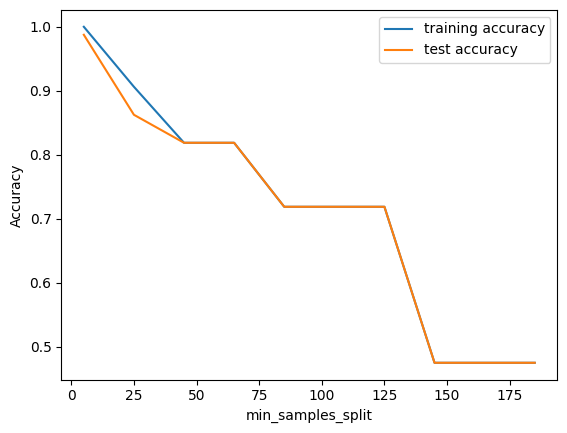

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Low `min_samples_split` (1-25): High training accuracy, risk of overfitting.  
Moderate values (50-100): Accuracy stabilizes, better generalization.  
High values (150+): Sharp accuracy drop, leading to underfitting.  
Optimal range:Likely (25-100), where both training and test accuracy are balanced.

### Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006577,0.000690,0.004615,0.000397,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
1,0.006822,0.001548,0.004830,0.001289,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
2,0.005162,0.000659,0.006712,0.003220,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
3,0.005084,0.000676,0.005963,0.002119,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
4,0.005365,0.000955,0.004327,0.001032,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
5,0.004233,0.000143,0.003309,0.000051,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
6,0.004594,0.000389,0.003895,0.000560,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
7,0.004820,0.000554,0.003743,0.000256,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.46875,0.46875,0.46875,0.46875,0.50000,0.47500,0.0125,9
8,0.005159,0.001568,0.003635,0.000447,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1
9,0.006185,0.002196,0.003992,0.000771,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.71875,0.71875,0.71875,0.71875,0.71875,0.71875,0.0000,1


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.71875
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


**Running the model with best parameters obtained from grid search.**

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10,min_samples_leaf=50,min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

0.725

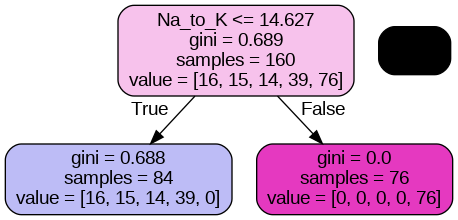

In [ ]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.58      0.93      0.72        15
           4       0.94      1.00      0.97        15

    accuracy                           0.72        40
   macro avg       0.30      0.39      0.34        40
weighted avg       0.57      0.72      0.63        40



In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  7  0]
 [ 0  0  0  1  0]
 [ 0  0  0  2  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 15]]
